In [4]:
# !pip install pycaret

In [5]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [61]:
df = pd.read_csv('fpl_player_data_clean_1.csv')
df.head().T

,0,1,2,3,4
ID,328,351,182,327,17
Name,M.Salah,Haaland,Palmer,Luis Díaz,Saka
Position,Midfielder,Forward,Midfielder,Midfielder,Midfielder
Team,Liverpool,Man City,Chelsea,Liverpool,Arsenal
Current Price,12.6,15.4,10.9,7.9,10.0
Total Points,74,69,69,55,54
Points Per Game,9.2,8.6,8.6,6.9,7.7
Event Points,12,2,2,1,0
Form,8.3,2.0,11.0,1.3,6.3
Influence,337.6,381.0,368.6,240.2,295.2


In [7]:
df["Goal Contributions"] = df["Goals Scored"] + df["Assists"]
df["Goals per 90"] = df["Goals Scored"] / (df["Minutes"] / 90)
df["Assists per 90"] = df["Assists"] / (df["Minutes"] / 90)
df["Threat per 90"] = df["Threat"] / (df["Minutes"] / 90)

In [8]:
df.to_csv('final_fpl_data.csv', index=False)

In [9]:
selected_columns = [
    'Position', 'Team', 'Current Price', 'Total Points',
    'Points Per Game', 'Event Points', 'Influence', 'Creativity', 'Threat', 'ICT Index', 
    'BPS', 'Chance Of Playing', 'Days Since News Added', 'Selected By Percent', 
    'Minutes', 'Goals Scored', 'Assists', 'Clean Sheets',
    'Goals Conceded', 'Goals Conceded per 90', 'Own Goals',
    'Penalties Saved', 'Penalties Missed', 'Yellow Cards', 'Red Cards',
    'Saves', 'Bonus', 
    'Direct_Freekick_or_Penalty', 'Indirect_Freekick_or_Corner', 'EP Next'
]
selected_df = df[selected_columns]

In [10]:
regression_setup = setup(data=selected_df, 
                         target='EP Next', 
                         session_id=42,  # For reproducibility
                         normalize=True,  # Standardize numerical features
                         categorical_features=['Position', 'Team'],  # Define categorical columns
                         train_size=0.8)  # 80% train, 20% test

,Description,Value
0,Session id,42
1,Target,EP Next
2,Target type,Regression
3,Original data shape,"(667, 30)"
4,Transformed data shape,"(667, 52)"
5,Transformed train set shape,"(533, 52)"
6,Transformed test set shape,"(134, 52)"
7,Numeric features,27
8,Categorical features,2
9,Rows with missing values,49.2%


In [11]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4649,0.7533,0.8493,0.7611,0.2605,0.5828,0.1070
lr,Linear Regression,0.5572,0.7108,0.8363,0.7592,0.3267,0.6334,23.2020
ridge,Ridge Regression,0.5551,0.7089,0.8353,0.7591,0.3265,0.6316,0.3150
gbr,Gradient Boosting Regressor,0.4941,0.7596,0.8618,0.7530,0.2732,0.6138,0.1140
huber,Huber Regressor,0.5297,0.7520,0.8576,0.7493,0.3074,0.5652,0.1100
br,Bayesian Ridge,0.5648,0.7519,0.8613,0.7451,0.3303,0.6378,0.1410
rf,Random Forest Regressor,0.5084,0.8050,0.8881,0.7352,0.2814,0.6786,0.1640
lightgbm,Light Gradient Boosting Machine,0.5563,0.8160,0.8967,0.7305,0.3080,0.7156,0.3840
omp,Orthogonal Matching Pursuit,0.5625,0.8409,0.9060,0.7240,0.3266,0.7187,0.0280
ada,AdaBoost Regressor,0.7345,1.0062,0.9984,0.6721,0.3852,0.8359,0.0800


In [12]:
test_predictions = predict_model(best_model)
print(test_predictions[['EP Next', 'prediction_label']].head())

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6330,1.4165,1.1901,0.6869,0.2930,0.5291


     EP Next  prediction_label
660      0.0             0.000
158      2.5             2.556
634      0.0             0.000
235      0.3             0.790
635      0.0             0.000


In [13]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5999,0.8235,0.9075,0.7712,0.3432,0.9249
1,0.5961,1.0672,1.0330,0.7497,0.2680,0.3743
2,0.5310,0.8246,0.9081,0.7414,0.2727,0.5484
3,0.5462,0.6761,0.8223,0.7990,0.3254,0.6407
4,0.5978,1.2400,1.1136,0.5713,0.2882,0.8832
5,0.5919,0.9414,0.9703,0.7618,0.3090,1.0478
6,0.4705,0.4738,0.6884,0.7746,0.3005,1.0320
7,0.4360,0.4963,0.7045,0.6860,0.2790,0.6365
8,0.6026,0.7631,0.8736,0.7618,0.3113,0.6550


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
final_model = finalize_model(tuned_model)


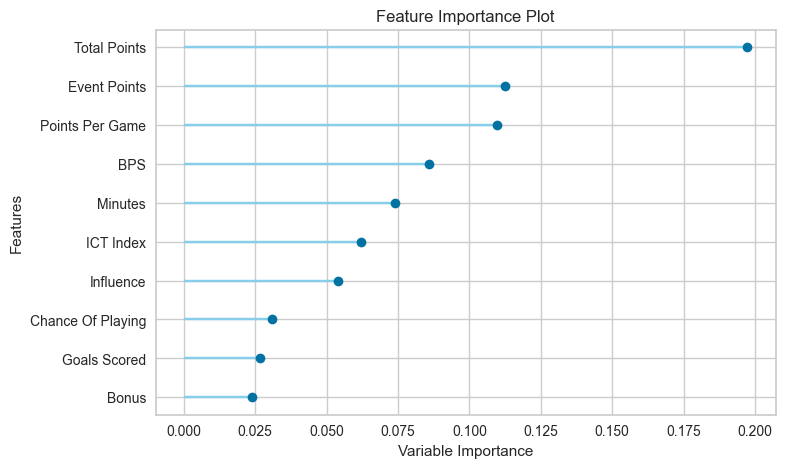

In [15]:
plot_model(final_model, plot='feature')

In [16]:
evaluate_model(final_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
new_player = pd.DataFrame({
    'Position': ['Midfielder'],              
    'Team': ['Newcastle'],
    'Current Price': [6.5], 
    'Total Points': [39],    
    'Influence': [153.8],
    'Selected By Percent': [3.7], 
    'Minutes': [409],                      
    'Goals Scored': [3],                    
    'Assists': [1],                         
    'Clean Sheets': [1],                    
    'Goals Conceded': [5],                 
    'Goals Conceded per 90': [1.1],           
    'Own Goals': [0],                          
    'Penalties Saved': [0],                    
    'Penalties Missed': [0],                  
    'Yellow Cards': [0],                       
    'Red Cards': [0],                           
    'Saves': [0],                             
    'Bonus': [8],                             
    'Direct_Freekick_or_Penalty': [0],         
    'Indirect_Freekick_or_Corner': [0],
    'Points Per Game':[4.9],
    'Event Points':[1],
    'Creativity':[100.4],
    'Threat':[151.0],
    'ICT Index':[40.6],
    'BPS':[127],
    'Chance Of Playing':[100],
    'Days Since News Added':[0],
    'Goal Contributions':[4]
})

predicted_points = predict_model(final_model, data=new_player)
print(predicted_points) #real - 1.5 

     Position       Team  Current Price  Total Points   Influence  \
0  Midfielder  Newcastle            6.5            39  153.800003   

   Selected By Percent  Minutes  Goals Scored  Assists  Clean Sheets  ...  \
0                  3.7      409             3        1             1  ...   

   Points Per Game  Event Points  Creativity  Threat  ICT Index  BPS  \
0              4.9             1  100.400002   151.0  40.599998  127   

   Chance Of Playing  Days Since News Added  Goal Contributions  \
0                100                      0                   4   

   prediction_label  
0             2.144  

[1 rows x 31 columns]


In [18]:
save_model(final_model, 'fpl_points_predictor1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Current Price', 'Total Points',
                                              'Points Per Game', 'Event Points',
                                              'Influence', 'Creativity',
                                              'Threat', 'ICT Index', 'BPS',
                                              'Chance Of Playing',
                                              'Days Since News Added',
                                              'Selected By Percent', 'Minutes',
                                              'Goals Scored', 'Assists',
                                              'Clean Sheets', 'Goals Conceded',
                                              'Goals Conceded per 90',
                                              'O...
                  TransformerWrapper(include=['Position', 'Team'],
                                     transformer=On

In [19]:
loaded_model = load_model('fpl_points_predictor1')


Transformation Pipeline and Model Successfully Loaded


**Selecting features based on Mututal information**

In [20]:
selected_columns1 = [
"Event Points",
"Total Points",
"BPS",
"Points Per Game",
"Influence",
"Team",
"Clean Sheets",
"Minutes",
"Goal Contributions",
"Bonus",
"ICT Index",
"Chance Of Playing",
"Selected By Percent",
"Creativity",
"Goals Scored",
"EP Next"]
selected_df1 = df[selected_columns1]

In [21]:
regression_setup = setup(data=selected_df1, 
                         target='EP Next', 
                         session_id=42,  # For reproducibility
                         normalize=True,  # Standardize numerical features
                         categorical_features=["Team"],
                         train_size=0.8)  # 80% train, 20% test


,Description,Value
0,Session id,42
1,Target,EP Next
2,Target type,Regression
3,Original data shape,"(667, 16)"
4,Transformed data shape,"(667, 35)"
5,Transformed train set shape,"(533, 35)"
6,Transformed test set shape,"(134, 35)"
7,Numeric features,14
8,Categorical features,1
9,Preprocess,True


In [22]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4798,0.7305,0.8419,0.7619,0.2589,0.6017,0.1010
et,Extra Trees Regressor,0.4629,0.7434,0.8481,0.7599,0.2614,0.5965,0.0630
lr,Linear Regression,0.5562,0.7192,0.8408,0.7583,0.3213,0.6311,0.0610
ridge,Ridge Regression,0.5540,0.7226,0.8431,0.7578,0.3204,0.6276,0.0180
br,Bayesian Ridge,0.5602,0.7668,0.8689,0.7443,0.3225,0.6295,0.0170
huber,Huber Regressor,0.5357,0.7819,0.8755,0.7417,0.3085,0.5677,0.0350
rf,Random Forest Regressor,0.4952,0.7876,0.8769,0.7412,0.2763,0.6779,0.0740
omp,Orthogonal Matching Pursuit,0.5395,0.8094,0.8858,0.7332,0.3160,0.6931,0.0180
lightgbm,Light Gradient Boosting Machine,0.5432,0.8280,0.8966,0.7245,0.3023,0.7221,0.3090
ada,AdaBoost Regressor,0.7009,0.9167,0.9523,0.6961,0.3721,0.8209,0.0380


In [23]:
test_predictions = predict_model(best_model)
print(test_predictions[['EP Next', 'prediction_label']].head())

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.6477,1.3138,1.1462,0.7096,0.2838,0.5089


     EP Next  prediction_label
660      0.0          0.095680
158      2.5          2.668953
634      0.0         -0.012145
235      0.3          0.398432
635      0.0         -0.012145


In [24]:
tuned_model = tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:13:54
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5065,0.6499,0.8062,0.8194,0.2761,0.8241
1,0.5641,0.9938,0.9969,0.7670,0.2603,0.3592
2,0.4824,0.7470,0.8643,0.7657,0.2381,0.4708
3,0.4975,0.6175,0.7858,0.8164,0.2911,0.5810
4,0.6023,1.3443,1.1594,0.5352,0.2914,0.7477
5,0.5169,0.8318,0.9121,0.7895,0.2874,0.9440
6,0.4506,0.4524,0.6726,0.7848,0.2817,0.7302
7,0.4201,0.5174,0.7193,0.6727,0.2653,0.4591
8,0.5767,0.8234,0.9074,0.7430,0.2852,0.6306


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
final_model = finalize_model(tuned_model)

In [26]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [27]:
new_player = pd.DataFrame({
    'Points Per Game': [4.9],
    'Influence': [153.8],
    'ICT Index': [40.6],
    'BPS': [127],
    'Selected By Percent': [3.7],
    'Minutes': [409],
    'Goal Contributions': [4],
    'Goals Scored': [3],
    'Total Points':[39],
    'Creativity':[100.4],
    "Chance Of Playing":[100],
    "Bonus":[8],
    "Team":['Newcastle'],
    "Clean Sheets":[1],
    "Event Points":[1]
})
predicted_points = predict_model(final_model, data=new_player)
print(predicted_points) # real - 1.5

   Points Per Game   Influence  ICT Index  BPS  Selected By Percent  Minutes  \
0              4.9  153.800003  40.599998  127                  3.7      409   

   Goal Contributions  Goals Scored  Total Points  Creativity  \
0                   4             3            39  100.400002   

   Chance Of Playing  Bonus       Team  Clean Sheets  Event Points  \
0                100      8  Newcastle             1             1   

   prediction_label  
0           1.93508  


In [28]:
save_model(final_model, 'fpl_points_predictor2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Event Points', 'Total Points',
                                              'BPS', 'Points Per Game',
                                              'Influence', 'Clean Sheets',
                                              'Minutes', 'Goal Contributions',
                                              'Bonus', 'ICT Index',
                                              'Chance Of Playing',
                                              'Selected By Percent',
                                              'Creativity', 'Goals Scored'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerW...
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Team'],
         

In [29]:
loaded_model = load_model('fpl_points_predictor2')

Transformation Pipeline and Model Successfully Loaded


**Selecting Feature based on Random Forest**

In [30]:
selected_columns3 = [
    "Event Points",
"Points Per Game",
"Total Points",
"BPS",
"Bonus",
"Team",
"Minutes",
"Selected By Percent",
"Influence",
"Goals per 90",
"Goals Conceded per 90",
"Current Price",
"Chance Of Playing",
"EP Next"]
selected_df3 = df[selected_columns3]

In [31]:
regression_setup = setup(data=selected_df3, 
                         target='EP Next', 
                         session_id=42,  # For reproducibility
                         normalize=True,  # Standardize numerical features
                         categorical_features=['Team'],
                         train_size=0.8)  # 80% train, 20% test

,Description,Value
0,Session id,42
1,Target,EP Next
2,Target type,Regression
3,Original data shape,"(667, 14)"
4,Transformed data shape,"(667, 33)"
5,Transformed train set shape,"(533, 33)"
6,Transformed test set shape,"(134, 33)"
7,Numeric features,12
8,Categorical features,1
9,Rows with missing values,34.0%


In [32]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4616,0.7197,0.8332,0.7714,0.2609,0.6038,0.0680
gbr,Gradient Boosting Regressor,0.5010,0.7472,0.8501,0.7658,0.2703,0.6110,0.0370
ridge,Ridge Regression,0.5709,0.7497,0.8575,0.7486,0.3303,0.6064,0.0160
rf,Random Forest Regressor,0.4929,0.7787,0.8735,0.7480,0.2767,0.6671,0.0650
huber,Huber Regressor,0.5124,0.7706,0.8605,0.7449,0.3034,0.5049,0.0330
br,Bayesian Ridge,0.5789,0.7882,0.8790,0.7398,0.3326,0.6249,0.0160
omp,Orthogonal Matching Pursuit,0.5395,0.8094,0.8858,0.7332,0.3160,0.6931,0.0160
lightgbm,Light Gradient Boosting Machine,0.5806,0.8953,0.9401,0.7061,0.3229,0.7184,0.0740
lr,Linear Regression,0.6495,0.9231,0.9178,0.6878,0.3620,0.7359,0.0180
ada,AdaBoost Regressor,0.7231,0.9898,0.9903,0.6768,0.3854,0.8522,0.0610


In [33]:
test_predictions = predict_model(best_model)
print(test_predictions[['EP Next', 'prediction_label']].head())

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6484,1.4720,1.2133,0.6746,0.2979,0.5317


     EP Next  prediction_label
660      0.0             0.000
158      2.5             2.906
634      0.0             0.000
235      0.3             0.959
635      0.0             0.000


In [34]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5793,0.7491,0.8655,0.7919,0.3437,0.9282
1,0.5924,1.0389,1.0193,0.7564,0.2674,0.3799
2,0.5341,0.8430,0.9182,0.7356,0.2749,0.5349
3,0.5355,0.6828,0.8263,0.7971,0.3238,0.6386
4,0.5810,1.1422,1.0687,0.6051,0.2759,0.8414
5,0.5588,0.8535,0.9239,0.7841,0.2996,1.0155
6,0.4545,0.4599,0.6782,0.7812,0.2962,0.9883
7,0.4154,0.4030,0.6348,0.7450,0.2586,0.6397
8,0.5778,0.6774,0.8230,0.7885,0.3116,0.6776


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [35]:
final_model = finalize_model(tuned_model)

In [36]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
new_player = pd.DataFrame({
    'Current Price': [6.5],
    'Team': ['Newcastle'],
    'Event Points': [1],
    'Selected By Percent': [3.7],
    'Minutes': [409],
    'Chance Of Playing':[100],
    "Points Per Game":[4.9],
    "Total Points":[39],
    "BPS":[127],
    "Bonus":[8],
    "Influence":[153.8],
"Goals per 90":[0.66],
"Goals Conceded per 90":[1.100]})
predicted_points = predict_model(final_model, data=new_player)
print(predicted_points) #real - 1.5

   Current Price       Team  Event Points  Selected By Percent  Minutes  \
0            6.5  Newcastle             1                  3.7      409   

   Chance Of Playing  Points Per Game  Total Points  BPS  Bonus   Influence  \
0                100              4.9            39  127      8  153.800003   

   Goals per 90  Goals Conceded per 90  prediction_label  
0          0.66                    1.1               1.5  


In [38]:
save_model(final_model, 'fpl_points_predictor3')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Event Points', 'Points Per Game',
                                              'Total Points', 'BPS', 'Bonus',
                                              'Minutes', 'Selected By Percent',
                                              'Influence', 'Goals per 90',
                                              'Goals Conceded per 90',
                                              'Current Price',
                                              'Chance Of Playing'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Team']...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Team'],
                                     transformer=OneHotEncoder(cols=['Team'],
                                                               handle

In [ ]:
loaded_model = load_model('fpl_points_predictor3')

Transformation Pipeline and Model Successfully Loaded


**Selecting Features based Wrapper Methods**

In [40]:
selected_columns4 = ['Team', 'Event Points', 'BPS', 'Chance Of Playing', 'Bonus',
       'Clean Sheet Adder', '2_Goals Conceded Adder', 'Goal Contributions',"EP Next"]
selected_df4 = df[selected_columns4]

In [41]:
regression_setup = setup(data=selected_df4, 
                         target='EP Next', 
                         session_id=42,  # For reproducibility
                         normalize=True,  # Standardize numerical features
                         train_size=0.8)  # 80% train, 20% test

,Description,Value
0,Session id,42
1,Target,EP Next
2,Target type,Regression
3,Original data shape,"(667, 9)"
4,Transformed data shape,"(667, 28)"
5,Transformed train set shape,"(533, 28)"
6,Transformed test set shape,"(134, 28)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


In [42]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4616,0.7511,0.8486,0.7621,0.2626,0.6279,0.0750
et,Extra Trees Regressor,0.4584,0.7516,0.8515,0.7579,0.2521,0.5974,0.0750
gbr,Gradient Boosting Regressor,0.4866,0.7603,0.8591,0.7540,0.2612,0.5940,0.0330
lightgbm,Light Gradient Boosting Machine,0.5074,0.7684,0.8653,0.7527,0.2893,0.6590,0.0960
huber,Huber Regressor,0.5291,0.8049,0.8871,0.7344,0.3100,0.5651,0.0190
br,Bayesian Ridge,0.5733,0.8263,0.9008,0.7245,0.3294,0.6348,0.0190
ridge,Ridge Regression,0.5705,0.8286,0.9020,0.7226,0.3291,0.6331,0.0200
lar,Least Angle Regression,0.5703,0.8290,0.9022,0.7224,0.3291,0.6330,0.0200
lr,Linear Regression,0.5726,0.8343,0.9053,0.7215,0.3313,0.6389,0.0200
ada,AdaBoost Regressor,0.7022,0.9428,0.9609,0.6963,0.3765,0.8591,0.0530


In [43]:
test_predictions = predict_model(best_model)
print(test_predictions[['EP Next', 'prediction_label']].head())

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.6076,1.2033,1.0969,0.7340,0.2743,0.4887


     EP Next  prediction_label
660      0.0             0.007
158      2.5             3.040
634      0.0             0.000
235      0.3             0.921
635      0.0             0.000


In [44]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5733,0.7470,0.8643,0.7924,0.3233,0.9224
1,0.6114,1.0687,1.0338,0.7494,0.2725,0.4601
2,0.4892,0.8109,0.9005,0.7457,0.2551,0.4537
3,0.5729,0.6361,0.7976,0.8109,0.3093,0.6513
4,0.5572,1.1729,1.0830,0.5945,0.2756,0.7248
5,0.5706,1.0289,1.0143,0.7397,0.3152,1.0338
6,0.4386,0.5057,0.7111,0.7595,0.2573,0.7686
7,0.3743,0.3179,0.5638,0.7989,0.2157,0.5235
8,0.5670,0.6963,0.8344,0.7826,0.2973,0.6337


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [45]:
final_model = finalize_model(tuned_model)

In [46]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [47]:
new_player = pd.DataFrame({
    'Team': ['Newcastle'],
    'Chance Of Playing': [100],
    'BPS':[127],
    'Bonus':[8],
    'Clean Sheet Adder': [1],
    '2_Goals Conceded Adder': [0],
    'Goal Contributions': [4],
    'Event Points':[1]
})
predicted_points = predict_model(final_model, data=new_player)
print(predicted_points) #real - 1.5

        Team  Chance Of Playing  BPS  Bonus  Clean Sheet Adder  \
0  Newcastle                100  127      8                  1   

   2_Goals Conceded Adder  Goal Contributions  Event Points  prediction_label  
0                       0                   4             1             2.112  


In [48]:
save_model(final_model, 'fpl_points_predictor4')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Event Points', 'BPS',
                                              'Chance Of Playing', 'Bonus',
                                              'Clean Sheet Adder',
                                              '2_Goals Conceded Adder',
                                              'Goal Contributions'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Team'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Team'],
                                     transformer=OneHotEncoder(cols=['Team'],
                                                               handle_missing='return_nan',
                                                  

In [49]:
loaded_model = load_model('fpl_points_predictor4')

Transformation Pipeline and Model Successfully Loaded


**Feature Selection on Embedded Selected Features**

In [50]:
selected_columns5 = ['Position', 'Team', 'Current Price', 'Total Points',
       'Event Points', 'Creativity', 'Threat', 'BPS', 'Chance Of Playing',
       'Days Since News Added', 'Minutes', 'Assists', 'Goals Conceded',
       'Own Goals', 'Penalties Saved', 'Yellow Cards', 'Red Cards', 'Bonus',
       'Indirect_Freekick_or_Corner', 'Goals per 90', 'Assists per 90',
       'Threat per 90', "EP Next"]
selected_df5 = df[selected_columns5]

In [51]:
regression_setup = setup(data=selected_df5, 
                         target='EP Next', 
                         session_id=42,  # For reproducibility
                         normalize=True,  # Standardize numerical features
                         categorical_features=['Team', 'Position'],
                         train_size=0.8)  # 80% train, 20% test

,Description,Value
0,Session id,42
1,Target,EP Next
2,Target type,Regression
3,Original data shape,"(667, 23)"
4,Transformed data shape,"(667, 45)"
5,Transformed train set shape,"(533, 45)"
6,Transformed test set shape,"(134, 45)"
7,Numeric features,20
8,Categorical features,2
9,Rows with missing values,71.1%


In [52]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4591,0.7278,0.8378,0.7676,0.2548,0.5790,0.0770
rf,Random Forest Regressor,0.4982,0.7883,0.8795,0.7404,0.2765,0.6542,0.0920
huber,Huber Regressor,0.5279,0.7847,0.8681,0.7359,0.3144,0.5572,0.0280
gbr,Gradient Boosting Regressor,0.5194,0.8037,0.8909,0.7355,0.2781,0.6291,0.0530
ridge,Ridge Regression,0.5743,0.7723,0.8720,0.7348,0.3392,0.6568,0.0240
lr,Linear Regression,0.5778,0.7731,0.8730,0.7341,0.3400,0.6653,0.0250
br,Bayesian Ridge,0.5761,0.7896,0.8815,0.7314,0.3384,0.6545,0.0260
lightgbm,Light Gradient Boosting Machine,0.5574,0.8329,0.9007,0.7296,0.3074,0.7380,0.1430
omp,Orthogonal Matching Pursuit,0.5547,0.8280,0.8974,0.7273,0.3254,0.7377,0.0250
ada,AdaBoost Regressor,0.7004,0.9076,0.9492,0.7010,0.3734,0.8217,0.0460


In [53]:
test_predictions = predict_model(best_model)
print(test_predictions[['EP Next', 'prediction_label']].head())

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.6570,1.4518,1.2049,0.6791,0.3055,0.5551


     EP Next  prediction_label
660      0.0             0.000
158      2.5             2.343
634      0.0             0.000
235      0.3             0.953
635      0.0             0.000


In [54]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5762,0.7613,0.8725,0.7885,0.3398,0.8866
1,0.6138,1.1133,1.0551,0.7389,0.2748,0.3776
2,0.5335,0.8688,0.9321,0.7275,0.2747,0.5276
3,0.5386,0.6880,0.8295,0.7955,0.3277,0.6253
4,0.5605,1.0807,1.0396,0.6263,0.2701,0.7977
5,0.5793,0.9442,0.9717,0.7611,0.3079,1.0574
6,0.4632,0.4959,0.7042,0.7641,0.2990,0.9689
7,0.4158,0.4268,0.6533,0.7300,0.2644,0.6435
8,0.5806,0.7021,0.8379,0.7808,0.3025,0.6319


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [55]:
final_model = finalize_model(tuned_model)

In [56]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [57]:
new_player = pd.DataFrame({
    'Team' : ['Newcastle'],
    'Minutes': [409],
    'Position':['Midfielder'],
    'Current Price':[6.5],
    'Event Points':[1],
    'Threat':[151.0],
    'Chance Of Playing':[100], 
    'Days Since News Added':[0],
    'Goals Conceded':[5],
    'Goals per 90':[0.66], 
    'Assists per 90':[0.22],
    'Threat per 90':[33.22],
    'Own Goals':[0],
    'Penalties Saved':[0],
    'Red Cards':[0],
    'Yellow Cards':[0],
    'Indirect_Freekick_or_Corner':[0],
    'Bonus':[8],
    'BPS':[127],
    'Total Points':[39],
    'Assists':[1],
    'Creativity':[100.4]
})
predicted_points = predict_model(final_model, data=new_player)
print(predicted_points) #real - 1.5

        Team  Minutes    Position  Current Price  Event Points  Threat  \
0  Newcastle      409  Midfielder            6.5             1   151.0   

   Chance Of Playing  Days Since News Added  Goals Conceded  Goals per 90  \
0                100                      0               5          0.66   

   ...  Penalties Saved  Red Cards  Yellow Cards  Indirect_Freekick_or_Corner  \
0  ...                0          0             0                            0   

   Bonus  BPS  Total Points  Assists  Creativity  prediction_label  
0      8  127            39        1  100.400002             1.813  

[1 rows x 23 columns]


In [58]:
save_model(final_model, 'fpl_points_predictor5')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Current Price', 'Total Points',
                                              'Event Points', 'Creativity',
                                              'Threat', 'BPS',
                                              'Chance Of Playing',
                                              'Days Since News Added', 'Minutes',
                                              'Assists', 'Goals Conceded',
                                              'Own Goals', 'Penalties Saved',
                                              'Yellow Cards', 'Red Cards',
                                              'Bonus',
                                              'Indirect_Freekick_or_Corner',
                                              'Goals per 90', 'Assis...
                  TransformerWrapper(include=['Team', 'Position'],
                                     transformer=OneHot

In [59]:
loaded_model = load_model('fpl_points_predictor5')

Transformation Pipeline and Model Successfully Loaded


In [60]:
print(type(loaded_model))

<class 'pycaret.internal.pipeline.Pipeline'>


First model : with all features
R-squared : 0.7611
Actual value : 1.5
Predicated value : 2.1

-----------------------------------

Second model : only features with mutual information
R-squared : 0.7619
Actual value : 1.5
Predicated value : 1.9

-----------------------------------

Third model: Only features with random forest
R-squared :0.7714
Actual value : 1.5
Predicated value : 1.5

-----------------------------------

Fourth model: Only features with Wrapper method
R-squared : 0.7621
Actual value : 1.5
Predicated value : 2.1

-----------------------------------

Fifth model: Only features with Embedded method
R-squared : 0.7676
Actual value : 1.5
Predicated value : 1.8


As per my thinking, R-squared is descreased after dropping 'Form'.
All the model have not much difference in R-squared.
although, we predicated value is nearly the actual one, however, we can't conclude I think we have to do predict more value.
better to run all these models, in our system to check the difference.

so far so good, model 3 is better